<center> <h1> Homework II </h1></center>
<h2> Task 1: Text Classification </h2>
<p> The task asks a SVM classifier for predicting the author of a text fragment </p>

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
def plot_decision_boundary(model,X, y,target_names,model_name):
    
    plt.figure(figsize=(12,8))
    colors = range(20)#generate_colors(target_names.size)
    #colors = [plt.cm.Spectral(each)
          #for each in np.linspace(0, 1, target_names.size)]
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))

    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid).reshape(xx.shape)
    cs = plt.contourf(xx,yy,Z, cmap=plt.cm.Paired)
    plt.axis('tight')
  
    for i, color in zip(model.classes_, colors):
        idx = np.where( y == i)
        plt.scatter(X[idx, 0], X[idx, 1], label = target_names[i],
                 cmap=plt.cm.Paired,edgecolor='black', s=50, vmin=-.2, vmax=1.2,)
        
    plt.title("Decision boundary of multi-class of " + model_name)
    plt.axis('tight')
    plt.xlabel('most important feature1')
    plt.ylabel('most important feature2')
    
    plt.legend()
    plt.show()

<h3> Cleaning the dataset </h3>
    <p> In order to use machine learning alghorithms for this task we need to transform the data into numbers(<b>feature extraction</b>). For doing so, we will use tf-idf vectorization which comprise both <b>term frequency</b> and <b> document frequency</b>. Also we will remove those words which appear in more than 90% of the texts.</p>

In [3]:
from sklearn.utils import shuffle
from sklearn import preprocessing

documents = pd.read_csv("Agarici A.V Eduard.csv")
documents.drop(['Unnamed: 0'], axis = 1, inplace = True)

y = documents.columns.values
X = documents.values.flatten()
y, target_names = np.array(pd.factorize(y))
y = np.array([y,]*20).ravel().astype('int')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df = 0.9,strip_accents='ascii', stop_words='english',token_pattern=r'(?u)\b[A-Za-z]+\b',norm = 'l2',sublinear_tf = False)
X_vectorized = vectorizer.fit_transform(X).toarray()
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.33, random_state=42, shuffle = True)

<h3>Tune hyperparameters and evaluate model </h3>

In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
 
parameters = {'kernel':('linear', 'rbf'), 'C':[0.1, 1, 10,100,1000], 'gamma' : ('auto','scale')}
model = SVC()
best_model = GridSearchCV(model, parameters, cv = 2, verbose = 10, n_jobs = -1)
best_model.fit(X_train,y_train)
print(best_model.best_params_)
best_model.score(X_test,y_test)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:  6.9min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed:  7.2min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  7.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  7.9min finished
C:\Users\Eduard Agarici\AppData\Local\conda\conda\envs\unibuc_env\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 10, 'gamma': 'auto', 'kernel': 'linear'}


0.8712121212121212

<h3> Comparison with PCA version </h3>


In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 100)
X_reduced = pca.fit_transform(X_vectorized)
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.33, random_state=42)
model = SVC(C= 10 , kernel = 'linear', gamma = 'auto')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9090909090909091

<h3> Visualization </h3>


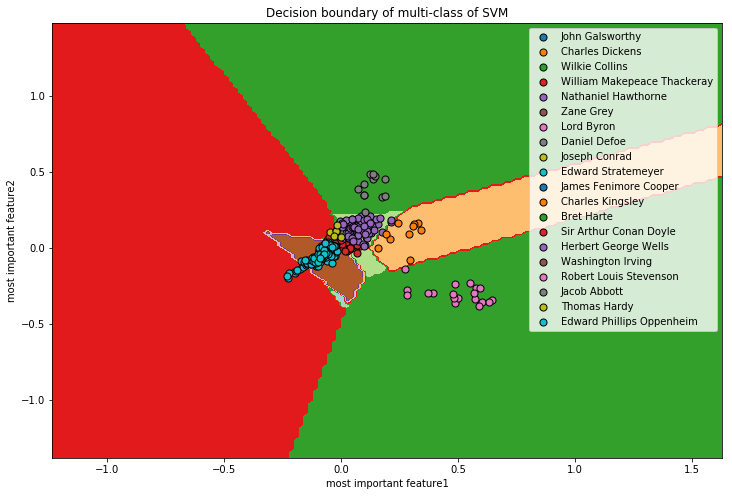

In [8]:
pca = PCA(n_components = 2)
X_reduced = pca.fit_transform(X_vectorized)
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.33, random_state=42)
model = SVC(C= 10 , kernel = 'linear', gamma = 'auto')
model.fit(X_train,y_train)
plot_decision_boundary(model, X_reduced, model.predict(X_reduced),target_names,"SVM")

<h2> Conclusion : PCA and non PCA have pretty similar performances </h2>

<h2> Task 2: Text Clustering </h2>
<p> The task asks for text clustering using DbScan,KMeans and Agglomerative. Furthermore, it also asks for some descriptions and correlations in the dataset </p>
<p> We will perform the same cleaning operations on the dataset as in the classification problem </p>

In [9]:
documents = pd.read_csv("Agarici A.V Eduard.csv")
documents.drop(['Unnamed: 0'], axis = 1, inplace = True)

y = documents.columns.values
X = documents.values.flatten()
y, target_names = np.array(pd.factorize(y))
y = np.array([y,]*20).ravel().astype('int')

<h3>I.DBSCAN </h3>

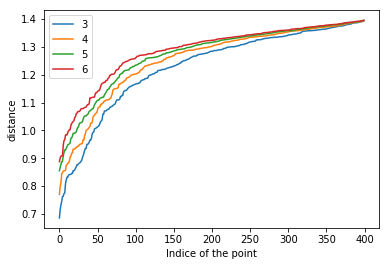

In [10]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score,homogeneity_score,completeness_score
from sklearn.neighbors import kneighbors_graph

kk = [3, 4, 5, 6]
for k in kk :
    distances = kneighbors_graph(X_vectorized,k, mode='distance', include_self=False, n_jobs = -1).toarray()
    distances = np.sort(np.sort(distances[distances != 0].reshape(-1,k))[:,k-1])
    plt.plot(range(X_vectorized.shape[0]),distances)
plt.legend(kk)
plt.xlabel('Indice of the point')
plt.ylabel('distance')
plt.show()
  

<p> From the graph it can be easily observed that for min_samples = 4 and eps ~= 1.2 dbscan will peform the best for the provided dataset </p>

In [11]:
best_model = DBSCAN(eps = 1.2, min_samples = 4, n_jobs = -1).fit(X_vectorized)
labels = best_model.labels_
n_noise_ = list(labels).count(-1)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % homogeneity_score(y, labels))
print("Completeness: %0.3f" % completeness_score(y, labels))
print("Silhouette Coefficient: %0.3f" % silhouette_score(X_vectorized, labels))

Estimated number of clusters: 14
Estimated number of noise points: 231
Homogeneity: 0.398
Completeness: 0.708
Silhouette Coefficient: 0.027


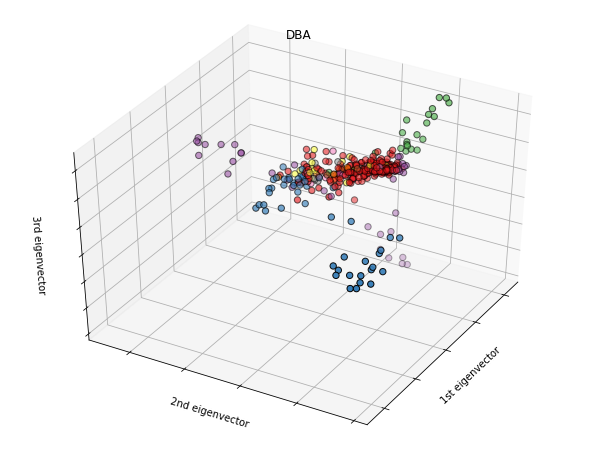

In [12]:
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components = 3)
X_reduced = pca.fit_transform(X_vectorized)

fig = plt.figure(1, figsize=(10, 10))
ax = Axes3D(fig, elev=-140, azim=150)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=labels, label = set(labels),
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("DBA")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()


<h3>II. KMeans </h3>


In [13]:
from sklearn.cluster import KMeans

kk = np.array([15,20,25,30])

data = []
for k in kk:
    for i,method in enumerate(['k-means++', 'random']):
        model = KMeans(n_clusters = k, init = method, n_jobs = -1)
        model.fit(X_vectorized)
        data.append([method,k,silhouette_score(X_vectorized,model.labels_), homogeneity_score(y,model.labels_),completeness_score(y,model.labels_)])

hyperparameters_scores = pd.DataFrame(data,columns = ('init','nr_clusters','silhouette_score','homogenity_score','completeness_score'))
hyperparameters_scores

,init,nr_clusters,silhouette_score,homogenity_score,completeness_score
0,k-means++,15,0.035486,0.477176,0.659027
1,random,15,0.031212,0.449478,0.628530
2,k-means++,20,0.042177,0.521342,0.624464
3,random,20,0.034339,0.476415,0.596140
4,k-means++,25,0.046106,0.612122,0.660664
5,random,25,0.035320,0.570353,0.619537
6,k-means++,30,0.053879,0.613031,0.633067
7,random,30,0.047551,0.617915,0.625523


In [14]:
best_model = KMeans(init = 'k-means++',n_clusters = 30).fit(X_vectorized)
labels = best_model.labels_
n_noise_ = list(labels).count(-1)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % homogeneity_score(y, labels))
print("Completeness: %0.3f" % completeness_score(y, labels))
print("Silhouette Coefficient: %0.3f" % silhouette_score(X_vectorized, labels))

Estimated number of clusters: 30
Estimated number of noise points: 0
Homogeneity: 0.623
Completeness: 0.644
Silhouette Coefficient: 0.050


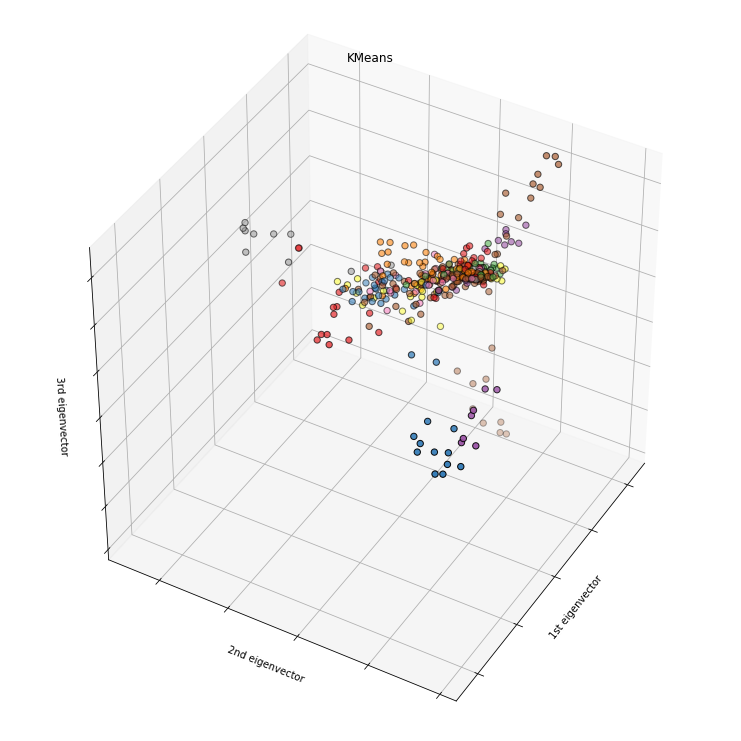

In [15]:
fig = plt.figure(1, figsize=(10, 10))
ax = Axes3D(fig, elev=-140, azim=150)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=labels, label = set(labels),
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("KMeans")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

<h3> III. AgglomerativeClustering</h3>

In [16]:
from sklearn.cluster import AgglomerativeClustering

kk = np.array([15,20,25,30,35])

data = []
for k in kk:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X_vectorized)
    #print('----- silhouete:',silhouette_score(X_vectorized,model.labels_),'k:',k,'init:',init)
    data.append([k,silhouette_score(X_vectorized,model.labels_), homogeneity_score(y,model.labels_),completeness_score(y,model.labels_)])

hyperparameters_scores = pd.DataFrame(data,columns = ('nr_clusters','silhouette_score','homogenity_score','completeness_score'))
hyperparameters_scores

,nr_clusters,silhouette_score,homogenity_score,completeness_score
0,15,0.039837,0.451352,0.701571
1,20,0.051487,0.557294,0.715410
2,25,0.060420,0.600466,0.707032
3,30,0.069800,0.646131,0.702777
4,35,0.076942,0.668638,0.681796


In [17]:
best_model = AgglomerativeClustering(n_clusters = 30).fit(X_vectorized)
labels = best_model.labels_
n_noise_ = list(labels).count(-1)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % homogeneity_score(y, labels))
print("Completeness: %0.3f" % completeness_score(y, labels))
print("Silhouette Coefficient: %0.3f" % silhouette_score(X_vectorized, labels))

Estimated number of clusters: 30
Estimated number of noise points: 0
Homogeneity: 0.646
Completeness: 0.703
Silhouette Coefficient: 0.070


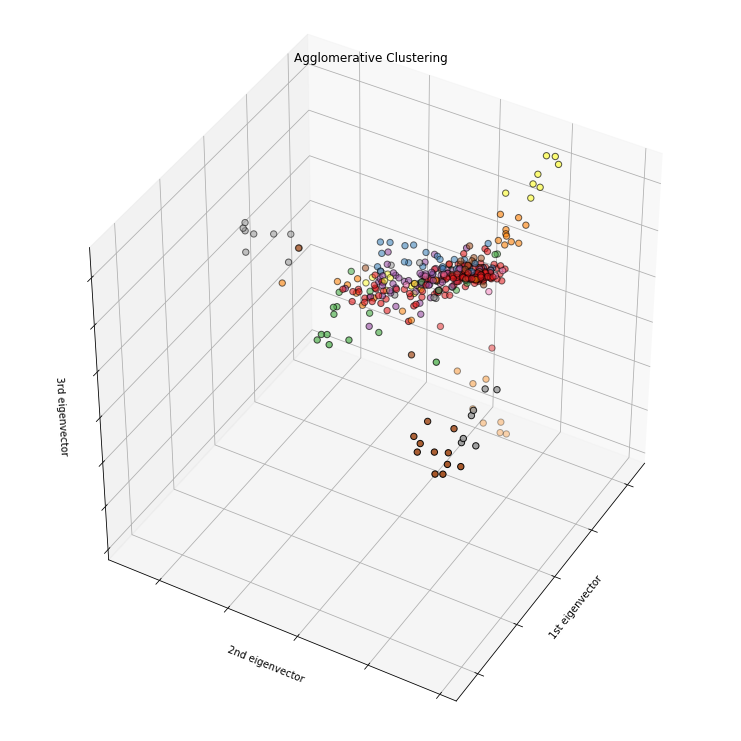

In [18]:
fig = plt.figure(1, figsize=(10, 10))
ax = Axes3D(fig, elev=-140, azim=150)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=labels, label = set(labels),
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

<h2> Conclusion: Algorithms used for clustering do not provide one cluster for each author. DBSCAN groups multiple authors due to their similar writing stlye while KMeans and AgglomerativeClustering performs better when given 30 clusters to train </h2>

<h2> Classification and Clustering with other embedings ( <b> Word2Vec </b>) </h2>


In [19]:
from sklearn.model_selection import train_test_split

documents = pd.read_csv("Agarici A.V Eduard.csv")
documents.drop(['Unnamed: 0'], axis = 1, inplace = True)

y = documents.columns.values
X = documents.values.flatten()
y, target_names = np.array(pd.factorize(y))
y = np.array([y,]*20).ravel().astype('int')

In [20]:
import os
import gensim
import nltk

class MySentences(object):
    """MySentences is a generator to produce a list of tokenized sentences 
    
    Takes a list of numpy arrays containing documents.
    
    Args:
        arrays: List of arrays, where each element in the array contains a document.
    """
    def __init__(self, *arrays):
        self.arrays = arrays
 
    def __iter__(self):
        for array in self.arrays:
            for document in array:
                for sent in nltk.sent_tokenize(document):
                    yield nltk.word_tokenize(sent)

def get_word2vec(sentences, location):
    """Returns trained word2vec
    
    Args:
        sentences: iterator for sentences
        
        location (str): Path to save/load word2vec
    """
    if os.path.exists(location):
        print('Found {}'.format(location))
        model = gensim.models.Word2Vec.load(location)
        return model
    
    print('{} not found. training model'.format(location))
    model = gensim.models.Word2Vec(sentences, size=100, window=5, min_count=5, workers=4)
    print('Model done training. Saving to disk')
    model.save(location)
    return model

C:\Users\Eduard Agarici\AppData\Local\conda\conda\envs\unibuc_env\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [21]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import StratifiedKFold
import scikitplot.plotters as skplt


class MyTokenizer:
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        transformed_X = []
        for document in X:
            tokenized_doc = []
            for sent in nltk.sent_tokenize(document):
                tokenized_doc += nltk.word_tokenize(sent)
            transformed_X.append(np.array(tokenized_doc))
        return np.array(transformed_X)
    
    def fit_transform(self, X, y=None):
        return self.transform(X)

class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(word2vec.wv.syn0[0])

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = MyTokenizer().fit_transform(X)
        
        return np.array([
            np.mean([self.word2vec.wv[w] for w in words if w in self.word2vec.wv]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])
    
    def fit_transform(self, X, y = None):
        return self.transform(X)

In [27]:
w2vec = get_word2vec(
    MySentences(
        X,
    ),
    'w2vmodel2'
)


Found w2vmodel2


<h3> Classification </h3>

In [28]:
mean_embedding_vectorizer = MeanEmbeddingVectorizer(w2vec)
X_vectorized_vec = mean_embedding_vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vectorized_vec, y, test_size=0.33, random_state=42, shuffle = True)

C:\Users\Eduard Agarici\AppData\Local\conda\conda\envs\unibuc_env\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).


In [29]:
parameters = {'kernel':('linear', 'rbf'), 'C':[0.1, 1, 10,100,1000], 'gamma' : ('auto','scale')}
model = SVC()
best_model = GridSearchCV(model, parameters, cv = 3,n_jobs = -1)
best_model.fit(X_train,y_train)
print(best_model.best_params_)
print("Score:",best_model.score(X_test,y_test))

{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Score: 0.9621212121212122


C:\Users\Eduard Agarici\AppData\Local\conda\conda\envs\unibuc_env\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


<h2> Clustering </h2>

<h3>I. DBSCAN </h3>

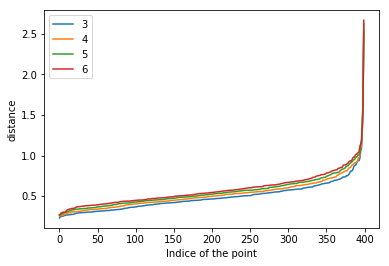

In [30]:
kk = [3, 4, 5, 6]
for k in kk :
    distances = kneighbors_graph(X_vectorized_vec,k, mode='distance', include_self=False, n_jobs = -1).toarray()
    distances = np.sort(np.sort(distances[distances != 0].reshape(-1,k))[:,k-1])
    plt.plot(range(X_vectorized.shape[0]),distances)
plt.legend(kk)
plt.xlabel('Indice of the point')
plt.ylabel('distance')
plt.show()

In [31]:
model = DBSCAN(eps = 0.65 , min_samples = 4).fit(X_vectorized_vec)
labels = model.labels_
n_noise_ = list(labels).count(-1)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % homogeneity_score(y, labels))
print("Completeness: %0.3f" % completeness_score(y, labels))
print("Silhouette Coefficient: %0.3f" % silhouette_score(X_vectorized_vec, labels))

Estimated number of clusters: 3
Estimated number of noise points: 33
Homogeneity: 0.118
Completeness: 0.653
Silhouette Coefficient: 0.144


 <h3>II. KMeans </h3>

In [32]:
kk = np.array([15,20,25,30])

data = []
for k in kk:
    for i,method in enumerate(['k-means++', 'random']):
        model = KMeans(n_clusters = k, init = method, n_jobs = -1)
        model.fit(X_vectorized_vec)
        data.append([method,k,silhouette_score(X_vectorized_vec,model.labels_), homogeneity_score(y,model.labels_),completeness_score(y,model.labels_)])

hyperparameters_scores = pd.DataFrame(data,columns = ('init','nr_clusters','silhouette_score','homogenity_score','completeness_score'))
hyperparameters_scores

,init,nr_clusters,silhouette_score,homogenity_score,completeness_score
0,k-means++,15,0.207781,0.531184,0.634265
1,random,15,0.212851,0.519496,0.626441
2,k-means++,20,0.219020,0.606600,0.631651
3,random,20,0.208900,0.621827,0.642034
4,k-means++,25,0.223440,0.636605,0.632680
5,random,25,0.220862,0.637287,0.636090
6,k-means++,30,0.219443,0.698697,0.650417
7,random,30,0.202331,0.690954,0.633044


In [33]:
best_model = KMeans(init = 'k-means++',n_clusters = 30).fit(X_vectorized_vec)
labels = best_model.labels_
n_noise_ = list(labels).count(-1)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % homogeneity_score(y, labels))
print("Completeness: %0.3f" % completeness_score(y, labels))
print("Silhouette Coefficient: %0.3f" % silhouette_score(X_vectorized_vec, labels))

Estimated number of clusters: 30
Estimated number of noise points: 0
Homogeneity: 0.667
Completeness: 0.620
Silhouette Coefficient: 0.221


<h3> III. Agglomerative Clustering </h3>


In [34]:
kk = np.array([15,20,25,30,35])

data = []
for k in kk:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X_vectorized_vec)
    #print('----- silhouete:',silhouette_score(X_vectorized,model.labels_),'k:',k,'init:',init)
    data.append([k,silhouette_score(X_vectorized_vec,model.labels_), homogeneity_score(y,model.labels_),completeness_score(y,model.labels_)])

hyperparameters_scores = pd.DataFrame(data,columns = ('nr_clusters','silhouette_score','homogenity_score','completeness_score'))
hyperparameters_scores

,nr_clusters,silhouette_score,homogenity_score,completeness_score
0,15,0.191696,0.545196,0.674133
1,20,0.205968,0.658240,0.698459
2,25,0.211615,0.698288,0.692275
3,30,0.220194,0.743500,0.691343
4,35,0.223350,0.761590,0.681939


In [35]:
best_model = AgglomerativeClustering(n_clusters = 30).fit(X_vectorized_vec)
labels = best_model.labels_
n_noise_ = list(labels).count(-1)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % homogeneity_score(y, labels))
print("Completeness: %0.3f" % completeness_score(y, labels))
print("Silhouette Coefficient: %0.3f" % silhouette_score(X_vectorized_vec, labels))

Estimated number of clusters: 30
Estimated number of noise points: 0
Homogeneity: 0.744
Completeness: 0.691
Silhouette Coefficient: 0.220


<h2> Conclusion : Word2Vec works better than the TfidfVectorizer on the provided dataset with aspect of Classification. When it comes to Clustering, Word2Vec provides better homogenity and silhouette coefficients</h2>